In [33]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
library(RColorBrewer)
library(cowplot)

In [34]:
players<-read_csv("players.csv")

sessions<-read_csv("sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [35]:
glimpse_p<-glimpse(players)
glimpse_p
glimpse_s<-glimpse(sessions)
glimpse_s
summary(players)
summary(sessions)
colSums(is.na(players))
colSums(is.na(sessions))

Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

experience    subscribe  hashedEmail played_hours         name       gender 
           0            0            0            0            0            0 
         Age 
           2

hashedEmail          start_time            end_time original_start_time 
                  0                   0                   2                   0 
  original_end_time 
                  2

Individual Planning Report (Minecraft Research Server)
By Payton Song

1. Data Description

For players.csv:
-Number of variables = 7
-Number of observations = 196
-Each row = a different player

For the following information it will be formatted as:
variable, type of variable, decsription of variable

-experience, character, Shows player's experience level as Pro, Veteran, Regular, or Amateur.
-subscribe, logical, Shows if a player is subscribed to the game's newsletter. TRUE means subscribed and FALSE means not subscribed.
-hashedEmail, character, Used to link session data with specific player's emails. Protected for privacy.
-played_hours, numeric, The number of hours a player spent on the server.
-name, character, Player's name
-gender, character, Shows the gender of the player. Male, Female, Other, or Prefer not to say.
-Age, numeric, shows player's age.

Summary Statistics:
For the following information it will be formatted as:
variable, minimum, mean, median, maximum

-played_hours, 0.00, 5.85, 0.10, 223.10
-Age, 9.00, 21.14, 19.00, 58.00

Missing Data:
Age has 2 missing values for this dataset.

For Sessions.csv
Summary Statistics: For the following information it will be formatted as: variable, minimum, mean, maximum -original_start_time, 1.712e+12, 1.719e+12, 1.727e+12 -original_end_time, 1.712e+12, 1.719e+12, 1.727e+12

Missing Data: -original_end_time is missing 2 values.

Potential Issues across both datasets: -Missing data for Age and original_end_time -Experience is self-reported and therefore may not be 100% accurate


2. Broad & Specific Questions
   
Broad Question (#2): We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.
Specific Question: Can experience level predict the total amount of time spent playing on the server in the players.csv dataset?

The exploration of this question will support the broader analysis because it will reveal the specific relationship between experience level and total time on the server. Experience level helps identify what "kind" of player, and the total time on server is used to measure the amount of data from said "kind" of player. This information can then be used to further understand how to recruit players that will contribute large amounts of data.

In [36]:
players <- players |> 
  mutate(experience = as.factor(experience),
    gender = as.factor(gender) )

players_mean<-players |> 
  summarize( mean_played_hours = round(mean(played_hours, na.rm = TRUE), 2),
    mean_age = round(mean(Age, na.rm = TRUE), 2))
players_mean

mean_played_hours,mean_age
<dbl>,<dbl>
5.85,21.14


Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 85 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


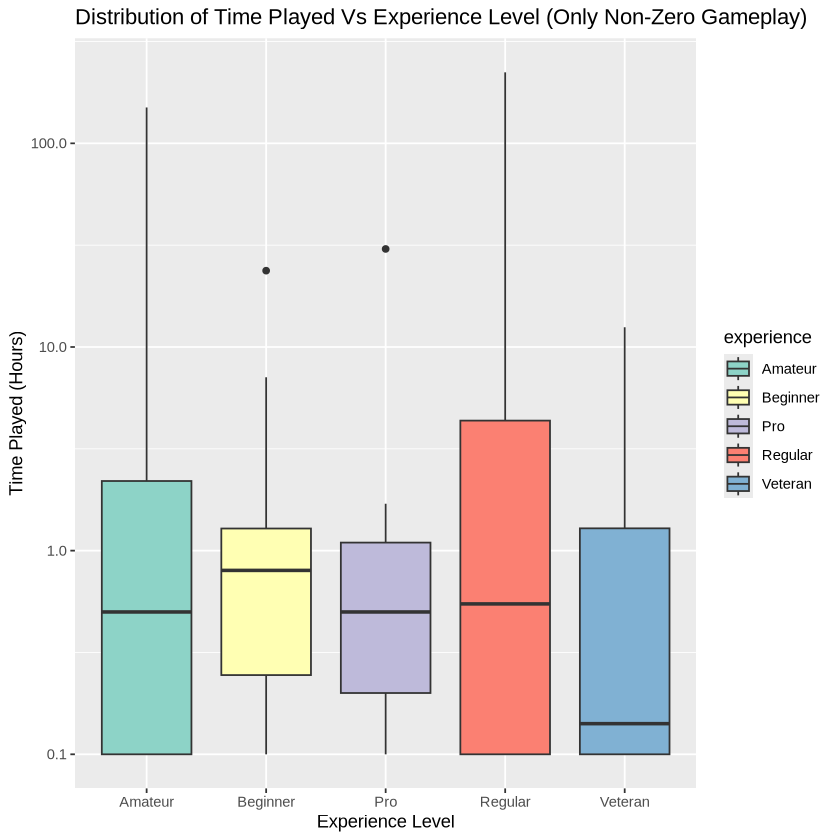

In [39]:
Distribuition_plot<-ggplot(players, aes(x = experience, y = played_hours, fill = experience)) +
  geom_boxplot() +
  labs(title = "Distribution of Time Played Vs Experience Level (Only Non-Zero Gameplay)",
    x = "Experience Level",
    y = "Time Played (Hours)")+
 scale_y_log10() + #log10 cannot display 0 values, this helps visualize the non-zero distribuition better
scale_fill_brewer(palette = "Set3")
Distribuition_plot

This box plot shows that there is differences between experience levels and the time played, excluding all zero hours played. Amateur and Regular players show quite a wide range of play times with high outliers. While Beginner and Pro players show a smaller range of playing times with fewer outliers. Veterans show a moderately wide range but with a noticeably lower playtime in comparison to the other experience levels.

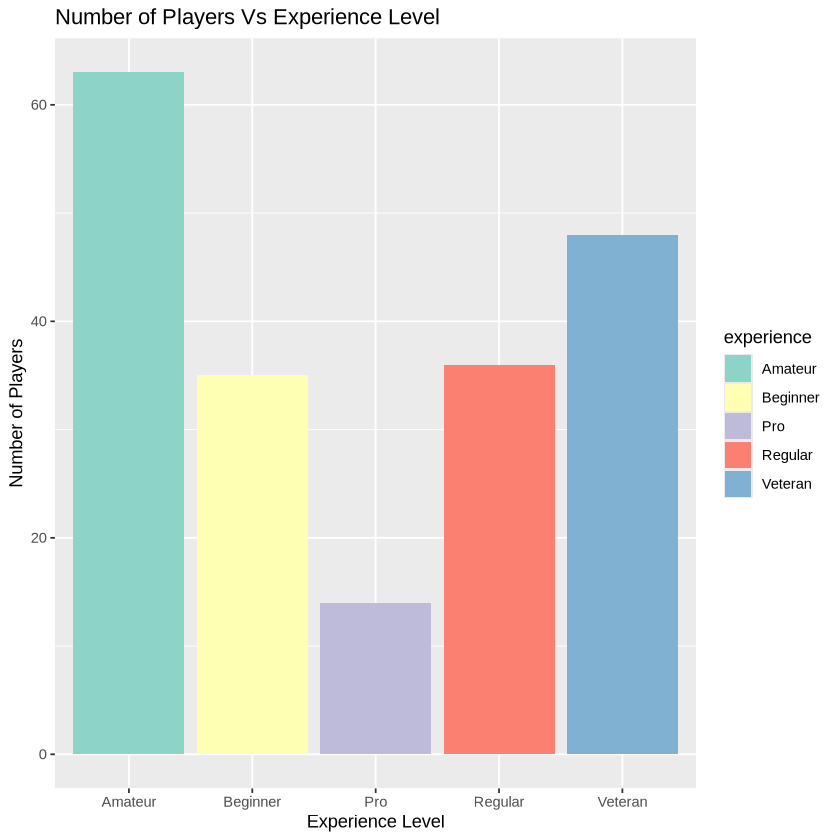

In [38]:
Number_plot<-ggplot(players, aes(x = experience, fill = experience)) +
  geom_bar() +
  labs( title = "Number of Players Vs Experience Level",
    x = "Experience Level",
    y = "Number of Players") +
scale_fill_brewer(palette = "Set3")
Number_plot

This graph shows that Amateur players are most abundant, followed by Veterans, Regulars, and then Beginners which maintain comparable numbers of players. While Pro's have a much smaller sample group. This indicates that the experience levels do not contribuite the same amount of data.

3. Exploratory Data Analysis & Visualization
The first graph indicates that there is a relationship between hours played and experience level, supporting that the specific question will yield meaningful results. The second graph shows that the numbers of players per experience level has sample sizes that are unequal. This may explain why Pro players have a seemingly higher average, due to their smaller sample size. This is also an important detail to note because the K-NN model's predictions can be skewed by larger groups. Overall, there seems to be a possible predictive relationship between the variables time played and experience level. This could reveal which groups contribute the most gameplay to then be targeted for advertising, the focus of the broader question. 

4. Methods & Plan
To address my specific question, "Can experience level predict the total amount of time spent playing on the server in the players.csv dataset?", I plan to use the K-NN (nearest neighbour) predictive model. This will reveal if players with the same experience level tend to contribute similar total hours played on the server. This method is appropriate because it does not make any assumptions about what the data will look like, this is helpful because the data is not linear. The K-NN model does not have many assumptions but instead pre-processing like scaling and centering predictors is necessary. K-NN uses the distance between observations to predict, this is why all predictors need to contribute equally to the calculation for proper prediction. Some limitations could be that outlying points can negatively impact the prediction model. Also, the fact that each experience level has different sample sizes can influence the prediction towards experience levels with larger data.

To begin processing the data I will split the dataset "players.csv" into (80%) training set and (20%) testing test, which leaves enough data to learn on and test predictions on unseen data. Then to tune the model I will use 5-fold cross validation to reduce overfitting by evaluating the models performance on unseen data across subsets. Next I will center and scale all the predictors to prevent from larger data dominating the predictions. Finally I will calculate RMSE and select the model with the lowest RMSE to ensure the ideal k value since it will have the lowest amount of comparable error.


5. Git Hub Link

